In [34]:
import torch
from torchvision.transforms import ToPILImage
from PIL import Image
from IPython.display import display

import importlib
import cli
importlib.reload(cli)  # Reload the module to get the latest version
from cli import predict, _load_and_preprocess_dataset

image_pixel_size = 32

ds = _load_and_preprocess_dataset(
    path="tkarr/sprite_caption_dataset",
    split="train",
    image_pixel_size=image_pixel_size,
)

In [45]:
from matplotlib import pyplot as plt

def predict_from_dataset_index(
    model_path: str = "best_model.pth",
    ds: torch.utils.data.Dataset = None,
    ds_index: int = 0,
    image_pixel_size: int = 64,
) -> torch.Tensor:
    input_tensor: torch.Tensor = ds[ds_index]["tensor"]
    output_tensor: torch.Tensor = predict(model_path, input_tensor, image_pixel_size)
    return output_tensor

def viz_compare_images(img1: Image.Image, img2: Image.Image):
    _, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(img1)
    axes[0].set_title('Image 1')
    axes[0].axis('off')
    axes[1].imshow(img2)
    axes[1].set_title('Image 2')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

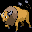

In [40]:
output_tensor = predict_from_dataset_index(
    model_path="best_model.pth",
    ds=ds,
    ds_index=0,
    image_pixel_size=image_pixel_size,
)
output_image: Image.Image = ToPILImage()(output_tensor)
display(output_image)

In [47]:
from ipywidgets import widgets

def pred_and_display(i: int):
    output_tensor = predict_from_dataset_index(
        model_path="best_model.pth",
        ds=ds,
        ds_index=i,
        image_pixel_size=image_pixel_size,
    )
    input_image: Image.Image = ToPILImage()(ds[i]["tensor"])
    output_image: Image.Image = ToPILImage()(output_tensor)
    viz_compare_images(input_image, output_image)

image_slider = widgets.IntSlider(
    min=0,
    max=100,
    step=1,
    description='Image index:',
    value=0
)

widgets.interactive(pred_and_display, i=image_slider)

interactive(children=(IntSlider(value=0, description='Image index:'), Output()), _dom_classes=('widget-interac…